# Homework 3: Exploratory analysis of data using Pandas Python library

Elaborated by Joseph Nicolay Ruiz Alvarez¹ for Data mining course 

Teacher: Michal Hemmerling

¹Institute of Physics of University of Antioquia, 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Exercise: CO2 Emissions 

Let's load the datasets as follow

In [2]:
data_1 = pd.read_csv('https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/cars_CO2_emissions_D.csv', sep=',')
data_2 = pd.read_csv('https://raw.githubusercontent.com/mhemmg/datasets/master/car_emission/car_brands_countries.csv', sep=',')

In [3]:
print(f'for first data: {data_1.columns}',
      f'\n\nfor second data: {data_2.columns}')

for first data: Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object') 

for second data: Index(['Make', 'Country', 'Continent'], dtype='object')


## 1. Loading and cleaning of data

### a) Merge the datasets

So, we have a number of car brands equal to

In [4]:
data_2.Make.unique().shape[0]

42

from a number of different countries equal to

In [5]:
data_2.Country.unique().shape[0]

7

In [6]:
data_CO2_emission = pd.merge(data_1, data_2)

### b) print the ten first and last rows of data

In [7]:
data_CO2_emission.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,premium gasoline,9.9,6.7,8.5,33.0,196.0,USA,America
1,ACURA,ILX,COMPACT,2.4,4.0,M6,premium gasoline,11.2,7.7,9.6,29.0,221.0,USA,America
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,premium gasoline,6.0,5.8,5.9,48.0,136.0,USA,America
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.7,9.1,11.1,25.0,255.0,USA,America
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,premium gasoline,12.1,8.7,10.6,27.0,244.0,USA,America
5,ACURA,RLX,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.9,7.7,10.0,28.0,230.0,USA,America
6,ACURA,TL,MID-SIZE,3.5,6.0,AS6,premium gasoline,11.8,8.1,10.1,28.0,232.0,USA,America
7,ACURA,TL AWD,MID-SIZE,3.7,6.0,AS6,premium gasoline,12.8,9.0,11.1,25.0,255.0,USA,America
8,ACURA,TL AWD,MID-SIZE,3.7,6.0,M6,premium gasoline,13.4,9.5,11.6,24.0,267.0,USA,America
9,ACURA,TSX,COMPACT,2.4,4.0,AS5,premium gasoline,10.6,7.5,9.2,31.0,212.0,USA,America


In [8]:
data_CO2_emission.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
6267,GENESIS,G80 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.6,10.4,13.2,21.0,312.0,USA,America
6268,GENESIS,G70,COMPACT,2.0,4.0,M6,premium gasoline,12.8,8.5,10.9,26.0,255.0,USA,America
6269,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.5,8.7,10.3,27.0,241.0,USA,America
6270,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,13.3,9.5,11.6,24.0,274.0,USA,America
6271,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,premium gasoline,11.4,8.6,10.2,28.0,238.0,USA,America
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,premium gasoline,14.1,9.5,12.0,24.0,284.0,USA,America
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,premium gasoline,13.6,9.5,11.8,24.0,280.0,USA,America
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,premium gasoline,15.4,10.2,13.1,22.0,311.0,USA,America
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe
6276,BUGATTI,Chiron,TWO-SEATER,8.0,16.0,AM7,premium gasoline,26.8,16.6,22.2,13.0,522.0,Italy,Europe


### c) & d) Info of data frame 

In [9]:
data_CO2_emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6277 entries, 0 to 6276
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6277 non-null   object 
 1   Model                             6277 non-null   object 
 2   Vehicle Class                     6277 non-null   object 
 3   Engine Size(L)                    6277 non-null   object 
 4   Cylinders                         6277 non-null   float64
 5   Transmission                      6277 non-null   object 
 6   Fuel Type                         6277 non-null   object 
 7   Fuel Consumption City (L/100 km)  6276 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6275 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6277 non-null   float64
 10  Fuel Consumption Comb (mpg)       6277 non-null   float64
 11  CO2 Emissions(g/km)               6277 non-null   float64
 12  Countr

### e) Filling blank spaces with Nan values

In [10]:
data_CO2_emission =  data_CO2_emission.replace(r'(^\s*|\?)$', np.nan, regex=True)

### f) Analyzing Nan values in data and eliminate them

We have a quantity of Nan values equal to:

In [11]:
data_CO2_emission.isna().sum().sum()

6

After elimination, we have: 

In [12]:
data_CO2_emission = data_CO2_emission.dropna()
data_CO2_emission.isna().sum().sum()

0

### g) Eliminate duplicate rows in data frame

In [13]:
data_CO2_emission = data_CO2_emission.apply(lambda x: x.astype(str).str.upper()).drop_duplicates()

## 2. Addition and changes of characteristics

### a) rename the values of 'fuel type'

In [14]:
list_val_old = data_CO2_emission['Fuel Type'].unique()
print(list_val_old)
list_val_new = ['Z','D','X','E','N']

['PREMIUM GASOLINE' 'DIESEL' 'REGULAR GASOLINE' 'ETHANOL' 'NATURAL GAS']


In [15]:
data_CO2_emission['Fuel Type'] = data_CO2_emission['Fuel Type'].replace(list_val_old,list_val_new)
data_CO2_emission

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent
0,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33.0,196.0,USA,AMERICA
1,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29.0,221.0,USA,AMERICA
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48.0,136.0,USA,AMERICA
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25.0,255.0,USA,AMERICA
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27.0,244.0,USA,AMERICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,GENESIS,G70 AWD,COMPACT,2.0,4.0,AS8,Z,11.4,8.6,10.2,28.0,238.0,USA,AMERICA
6272,GENESIS,G70 AWD,COMPACT,3.3,6.0,AS8,Z,14.1,9.5,12.0,24.0,284.0,USA,AMERICA
6273,GENESIS,G90 AWD,FULL-SIZE,3.3,6.0,AS8,Z,13.6,9.5,11.8,24.0,280.0,USA,AMERICA
6274,GENESIS,G90 AWD,FULL-SIZE,5.0,8.0,AS8,Z,15.4,10.2,13.1,22.0,311.0,USA,AMERICA


### b) Create a column called 'Automatic / Manual': A and M from 'Transmission' column.

In [16]:
data_CO2_emission['Automatic / Manual'] = data_CO2_emission.Transmission.str.extract(r'(^\w{1})')
data_CO2_emission['Automatic / Manual']

0       A
1       M
2       A
3       A
4       A
       ..
6271    A
6272    A
6273    A
6274    A
6275    A
Name: Automatic / Manual, Length: 5980, dtype: object

### c) Create a new column called ' A / M digital', where hot-encoding before column: 1 / 0

In [17]:
data_CO2_emission['A / M digital'] = pd.get_dummies(data_CO2_emission['Automatic / Manual'])['M']

## 3 

### a) amount of car brands

So, we have a number of car brands equal to

In [18]:
data_2.Make.unique().shape[0]

42

from a number of different countries equal to

In [19]:
data_2.Country.unique().shape[0]

7

### b) the most popular car brands according to data

These are the total car brand present in data set.

In [20]:
Car_brands = data_CO2_emission.Make.value_counts()

And these are the most popular brands listed in sort:

In [21]:
Car_brands.head(10)

FORD             563
CHEVROLET        503
BMW              488
MERCEDES-BENZ    362
GMC              278
AUDI             261
PORSCHE          257
TOYOTA           252
NISSAN           192
JEEP             188
Name: Make, dtype: int64

### c) the less popular car brands according to data

And these are the less popular brands listed in sort:

In [22]:
Car_brands.tail(10)[::-1]

BUGATTI          1
SRT              2
SMART            8
ALFA ROMEO      13
GENESIS         14
SCION           21
BENTLEY         35
LAMBORGHINI     37
ASTON MARTIN    39
ROLLS-ROYCE     44
Name: Make, dtype: int64

### d) the car with minor CO2 emission

In [23]:
emissions = data_CO2_emission['CO2 Emissions(g/km)'].astype(float)
mask =  emissions ==  emissions.min()
data_CO2_emission[mask]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual,A / M digital
3078,HYUNDAI,IONIQ BLUE,FULL-SIZE,1.6,4.0,AM6,X,4.2,4.0,4.1,69.0,96.0,KOREA,ASIA,A,0


### e) the car with major CO2 emission

In [24]:
emissions = data_CO2_emission['CO2 Emissions(g/km)'].astype(float)
mask =  emissions ==  emissions.max()
data_CO2_emission[mask]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Country,Continent,Automatic / Manual,A / M digital
6275,BUGATTI,CHIRON,TWO-SEATER,8.0,16.0,AM7,Z,26.8,16.6,22.2,13.0,522.0,ITALY,EUROPE,A,0


### e) Average emission by brand car

In [25]:
data_CO2_emission['CO2 Emissions(g/km)'] = data_CO2_emission['CO2 Emissions(g/km)'].astype(float)
Car_brands = data_CO2_emission.groupby('Make')
Car_brands['CO2 Emissions(g/km)'].mean()

Make
ACURA            222.020833
ALFA ROMEO       236.384615
ASTON MARTIN     344.282051
AUDI             252.318008
BENTLEY          367.914286
BMW              252.709016
BUGATTI          522.000000
BUICK            233.747253
CADILLAC         266.366906
CHEVROLET        264.669980
CHRYSLER         243.725806
DODGE            275.562914
FIAT             192.518519
FORD             261.591474
GENESIS          282.571429
GMC              301.910072
HONDA            190.923611
HYUNDAI          210.549708
INFINITI         253.953488
JAGUAR           273.138614
JEEP             249.627660
KIA              215.445055
LAMBORGHINI      402.270270
LAND ROVER       290.301370
LEXUS            242.124031
LINCOLN          266.974359
MASERATI         319.612245
MAZDA            192.680000
MERCEDES-BENZ    278.729282
MINI             196.165775
MITSUBISHI       199.704225
NISSAN           237.104167
PORSCHE          261.482490
RAM              295.056338
ROLLS-ROYCE      388.204545
SCION          

### e) Average emission by continent

In [26]:
Continents = data_CO2_emission.groupby('Continent')
Continents['CO2 Emissions(g/km)'].mean()

Continent
AMERICA    266.177221
ASIA       216.318084
EUROPE     258.690941
Name: CO2 Emissions(g/km), dtype: float64

## 4
### a) 

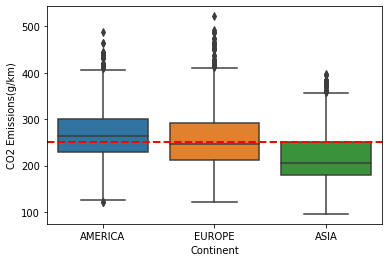

In [27]:
average_emission = data_CO2_emission['CO2 Emissions(g/km)'].mean()
ax = sns.boxplot(data=data_CO2_emission, x='Continent', y='CO2 Emissions(g/km)')
ax.axhline(average_emission, color='r',linestyle='dashed',linewidth=2)

### b)

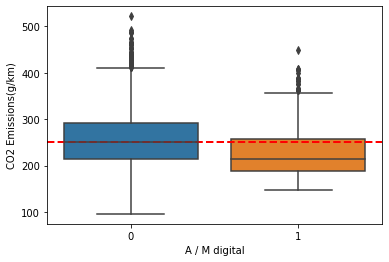

In [28]:
average_emission = data_CO2_emission['CO2 Emissions(g/km)'].mean()
ax = sns.boxplot(data=data_CO2_emission, x='A / M digital', y='CO2 Emissions(g/km)')
ax.axhline(average_emission, color='r',linestyle='dashed',linewidth=2)

Zero for Automatic, and One for Manual transmission 

### c)

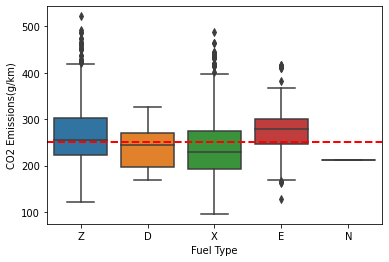

In [29]:
average_emission = data_CO2_emission['CO2 Emissions(g/km)'].mean()
ax = sns.boxplot(data=data_CO2_emission, x='Fuel Type', y='CO2 Emissions(g/km)')
ax.axhline(average_emission, color='r',linestyle='dashed',linewidth=2)

X = gasolina regular, Z = gasolina premium, D = diesel, E = etanol (E85), N = gas natural

### d) 

[Text(0, 0, '5025 (84.0%)'), Text(0, 0, '955 (16.0%)')]

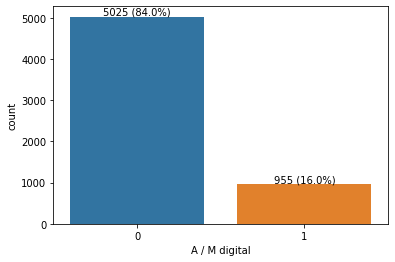

In [30]:
ax = sns.countplot(data=data_CO2_emission, x='A / M digital')
abs_values = data_CO2_emission['A / M digital'].value_counts(ascending=False).values
rel_values = data_CO2_emission['A / M digital'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)


### e) emission per car brand 

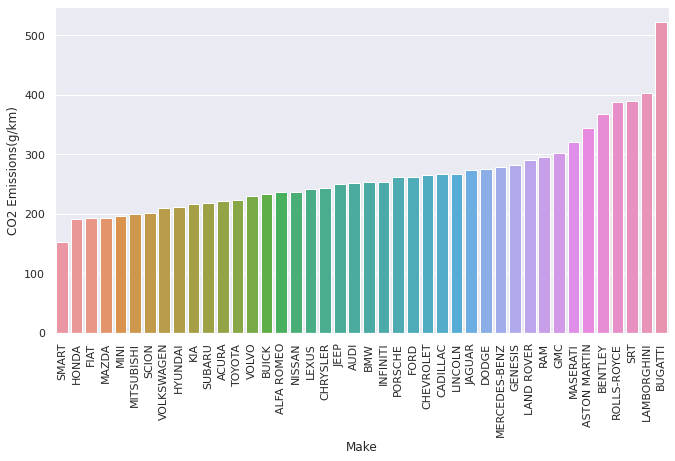

In [31]:
sns.set(rc={'figure.figsize':(11,6)})
df = data_CO2_emission.groupby('Make').mean().sort_values('CO2 Emissions(g/km)')
ax = sns.barplot(data=df, x=df.index, y='CO2 Emissions(g/km)')                 
ax.tick_params(axis='x', rotation=90)

### f) save data of average emission per car brand 

In [32]:
df.drop(columns='A / M digital').to_csv('BrandEmission.csv')

## 2. Exercise


In [33]:
%%time
data_olympics = pd.read_csv('https://raw.githubusercontent.com/mhemmg/datasets/master/sport/athlete_events.csv')

CPU times: user 974 ms, sys: 439 ms, total: 1.41 s
Wall time: 10.5 s


In [34]:
data_olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


We don't need some colums here, these are irrelevants: 
* ID
* NOC
* Games

For hence, We drop them

In [35]:
data_olympics = data_olympics.drop(columns=['ID', 'NOC', 'Games'])

Let's eliminate duplicate registers 

In [36]:
data_olympics = data_olympics.drop_duplicates()

In [37]:
data_olympics.head(10)

,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


Now, let's see how many Females (F) and Males (M) were registered:

In [38]:
data_olympics.Sex.value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

Separate the data set according to their Sex

In [39]:
women, men = [x for _, x in data_olympics.groupby(data_olympics.Sex == 'M')]

### a) Analyzing the tendency of champions through time 

For Women:

In [40]:
F_winners = women.dropna().reset_index(drop=True)
F_gold = F_winners[F_winners.Medal == 'Gold'].reset_index(drop=True)

<AxesSubplot:>

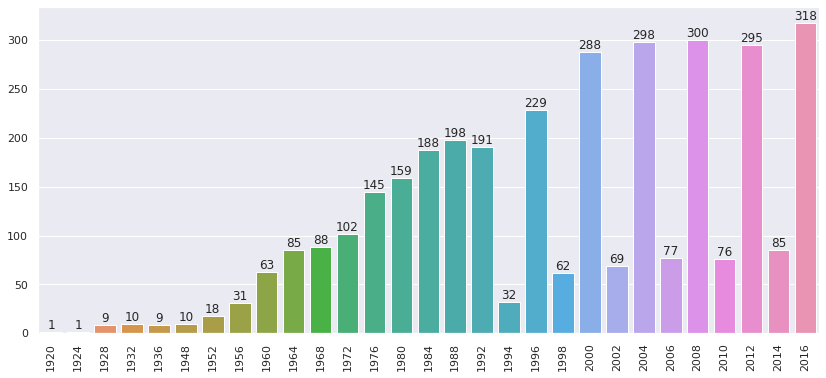

In [41]:
sns.set(rc={'figure.figsize':(14,6)})
df = F_gold.Year.value_counts().sort_index()
ax = sns.barplot(x=df.index, y=df.values)                 
ax.tick_params(axis='x', rotation=90)
abs_values = df.values
lbls = [f'{p[0]}' for p in zip(abs_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax

For men:

In [42]:
M_winners = men.dropna().reset_index(drop=True)
M_gold = M_winners[M_winners.Medal == 'Gold'].reset_index(drop=True)

<AxesSubplot:>

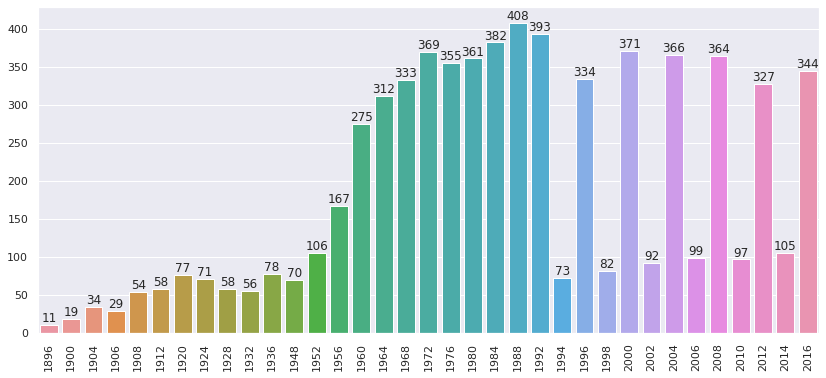

In [43]:
sns.set(rc={'figure.figsize':(14,6)})
df = M_gold.Year.value_counts().sort_index()
ax = sns.barplot(x=df.index, y=df.values)                 
ax.tick_params(axis='x', rotation=90)
abs_values = df.values
lbls = [f'{p[0]}' for p in zip(abs_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax

Focus in a specific sport, and look this tendency. Starting with women, we have the following results:

Let's see which sports we have in data:


In [44]:
print(data_olympics.Sport.unique(), f'\nTotal = {data_olympics.Sport.nunique()}')

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics'] 
Total = 66


For example, choose Rowing and analyze the Age throughout time.

<AxesSubplot:xlabel='Year', ylabel='Age'>

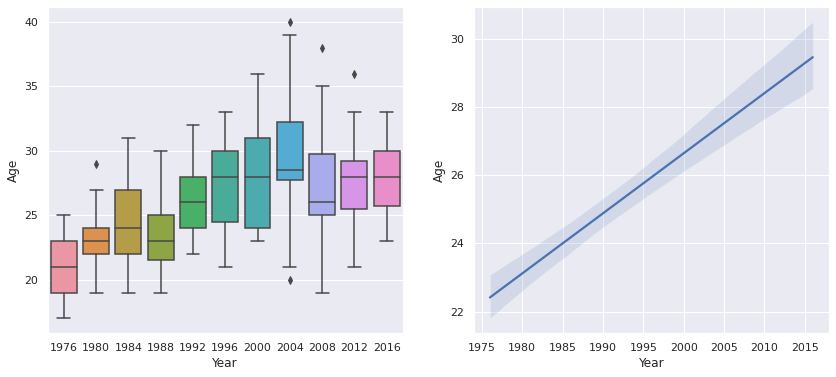

In [45]:
F_rowing = F_gold[F_gold.Sport == 'Rowing']
fig, ax = plt.subplots(1,2)
sns.boxplot(data=F_rowing, x='Year', y='Age', ax=ax[0])
sns.regplot(data=F_rowing, x='Year', y='Age',ax=ax[1], scatter=False)

And the average Age of gold winner women for each category is show bellow:

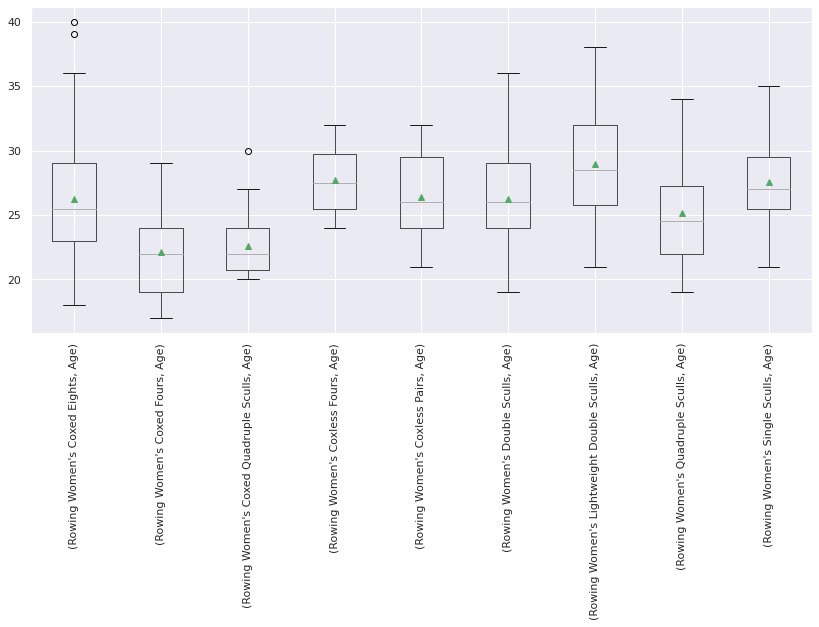

In [46]:
F_rowing_events = F_rowing.sort_values('Year').groupby('Event')
ax = F_rowing_events.boxplot('Year','Age', showmeans=True)
ax.tick_params(axis='x', rotation=90)

Compare the above results for Men

<AxesSubplot:xlabel='Year', ylabel='Age'>

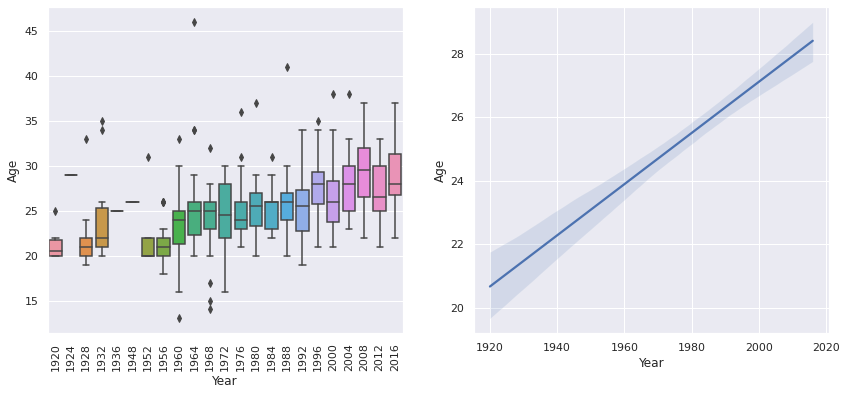

In [47]:
M_rowing = M_gold[M_gold.Sport == 'Rowing']
fig, ax = plt.subplots(1,2)
sns.boxplot(data=M_rowing, x='Year', y='Age', ax=ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.regplot(data=M_rowing, x='Year', y='Age',ax=ax[1], scatter=False)

And the average Age of gold winner men for each category is show bellow:

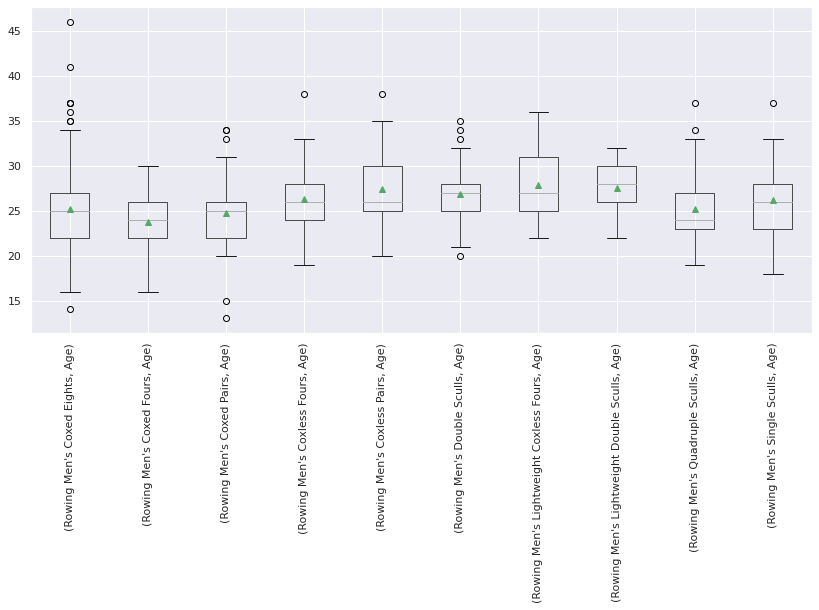

In [48]:
M_rowing_events = M_rowing.sort_values('Year').groupby('Event')
ax = M_rowing_events.boxplot('Year','Age', showmeans=True)
ax.tick_params(axis='x', rotation=90)

### b) Let's find additional information from data set

We can also see how many champions there has been in Male Boxing.
According each category:

In [49]:
M_gold[M_gold.Sport=='Boxing'].Event.value_counts()

Boxing Men's Welterweight          19
Boxing Men's Heavyweight           18
Boxing Men's Flyweight             17
Boxing Men's Middleweight          17
Boxing Men's Light-Welterweight    16
Boxing Men's Light-Heavyweight     16
Boxing Men's Bantamweight          16
Boxing Men's Lightweight           16
Boxing Men's Featherweight         16
Boxing Men's Light-Flyweight       13
Boxing Men's Light-Middleweight    11
Boxing Men's Super-Heavyweight      8
Name: Event, dtype: int64

The athletes with most medals in each category/event:

In [54]:
M_gold[M_gold.Sport=='Boxing'].groupby('Event').Name.value_counts().sort_values(ascending=False).head(10)

Event                            Name                      
Boxing Men's Heavyweight         Flix Savn Fabr                3
                                 Tefilo Stevenson Laurence     3
Boxing Men's Bantamweight        Guillermo Rigondeaux Ortz     2
Boxing Men's Middleweight        Ariel Hernndez Azcuy          2
Boxing Men's Light-Middleweight  Boris Nikolayevich Lagutin    2
Boxing Men's Light-Flyweight     Zou Shiming                   2
Boxing Men's Lightweight         Mario Csar Kindeln Mesa       2
Boxing Men's Welterweight        Oleg Elekpayevich Saitov      2
Boxing Men's Light-Welterweight  Hctor Vinent Chron            2
                                 Jerzy Zdzisaw Kulej           2
Name: Name, dtype: int64

We can find who has been the man and woman with the most accumulated medals

For men:

In [97]:
M_winners[M_winners.Name == M_winners.Name.mode()[0]].Name.value_counts()

Michael Fred Phelps, II    28
Name: Name, dtype: int64

For women:

In [99]:
F_winners[F_winners.Name == F_winners.Name.mode()[0]].Name.value_counts()

Larysa Semenivna Latynina (Diriy-)    18
Name: Name, dtype: int64

Additionally, the oldest and youngest athlete:

In [93]:
print(data_olympics.loc[data_olympics.Age.idxmax()])
print('-------------------------')
print(data_olympics.loc[data_olympics.Age.idxmin()])

Name                           John Quincy Adams Ward
Sex                                                 M
Age                                              97.0
Height                                            NaN
Weight                                            NaN
Team                                    United States
Year                                             1928
Season                                         Summer
City                                        Amsterdam
Sport                                Art Competitions
Event     Art Competitions Mixed Sculpturing, Statues
Medal                                             NaN
Name: 257054, dtype: object
-------------------------
Name                         Dimitrios Loundras
Sex                                           M
Age                                        10.0
Height                                      NaN
Weight                                      NaN
Team              Ethnikos Gymnastikos Syllogos
Year      

The tallest and shortest athete:

In [79]:
print(data_olympics.loc[data_olympics.Height.idxmax()])
print('-------------------------')
print(data_olympics.loc[data_olympics.Height.idxmin()])

Name                         Yao Ming
Sex                                 M
Age                              20.0
Height                          226.0
Weight                          141.0
Team                            China
Year                             2000
Season                         Summer
City                           Sydney
Sport                      Basketball
Event     Basketball Men's Basketball
Medal                             NaN
Name: 265040, dtype: object
-------------------------
Name                               Rosario Briones
Sex                                              F
Age                                           15.0
Height                                       127.0
Weight                                        42.0
Team                                        Mexico
Year                                          1968
Season                                      Summer
City                                   Mexico City
Sport                          

The heaviest and lightest athlete:

In [80]:
print(data_olympics.loc[data_olympics.Weight.idxmax()])
print('-------------------------')
print(data_olympics.loc[data_olympics.Weight.idxmin()])

Name           Ricardo Blas, Jr.
Sex                            M
Age                         21.0
Height                     183.0
Weight                     214.0
Team                        Guam
Year                        2008
Season                    Summer
City                     Beijing
Sport                       Judo
Event     Judo Men's Heavyweight
Medal                        NaN
Name: 23155, dtype: object
-------------------------
Name                                Choi Myong-Hui
Sex                                              F
Age                                           14.0
Height                                       135.0
Weight                                        25.0
Team                                   North Korea
Year                                          1980
Season                                      Summer
City                                        Moskva
Sport                                   Gymnastics
Event     Gymnastics Women's Individual A

Finally, we can find interesting information like:

In [121]:
Most_freq = data_olympics[data_olympics.Name == data_olympics.Name.mode()[0]]
minAge = Most_freq.min(numeric_only=True).loc['Age']
maxAge = Most_freq.max(numeric_only=True).loc['Age']
minYear = Most_freq.min(numeric_only=True).loc['Year']
maxYear = Most_freq.max(numeric_only=True).loc['Year']

print(f'The athlete with most participation throughout history of olympic games is {Most_freq.Name.unique()[0]}', 
      f'\nWho participated from {int(minYear)} to {int(maxYear)}, during {int(maxYear-minYear)} years',
      f'\nStarted at age of {int(minAge)} years old, until {int(maxAge)} years old')

The athlete with most participation throughout history of olympic games is Heikki Ilmari Savolainen 
Who participated from 1928 to 1952, during 24 years 
Started at age of 20 years old, until 44 years old


The most popular sports according to Sex. 

For men we have: 

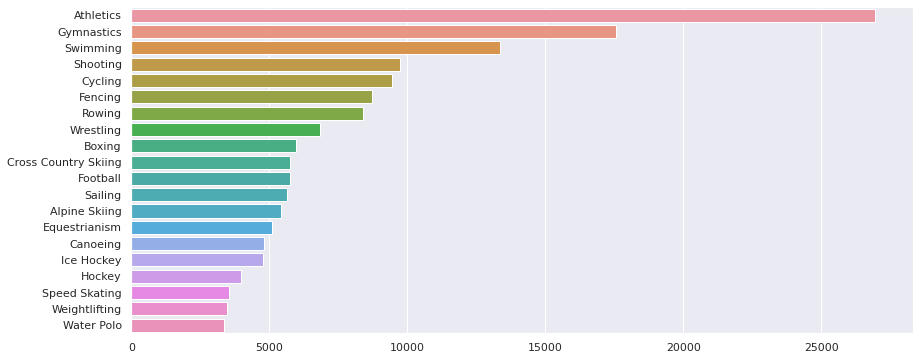

In [153]:
pop_men = men.Sport.value_counts().head(20)
ax = sns.barplot(y=pop_men.index, x=pop_men.values)

For women we have:

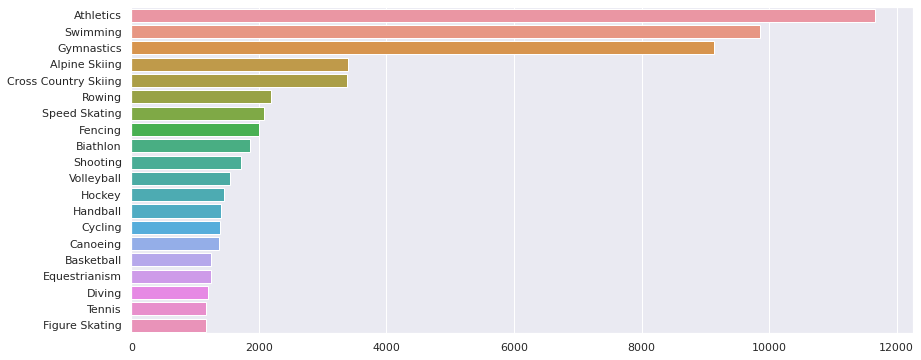

In [155]:
pop_women = women.Sport.value_counts().head(20)
ax = sns.barplot(y=pop_women.index, x=pop_women.values)